In [21]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [22]:
import numpy as np
from mytools.utils import get_mask_sector
from mytools.halo_opt import halo_subtract
from mytools.plot import plot_heatmap, save_plot, plot_sector
from mytools.plot_custom import plot_stack_fit_res, compare_profiles
%matplotlib inline

# Halo contribution fitting

<Axes: title={'center': 'Masked stack result'}, xlabel='X', ylabel='Y'>

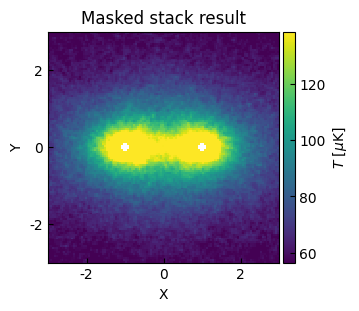

In [23]:
stack_result = np.load('tngcube_pairstack_result.npz')['data']

halo_peak_mask = get_mask_sector(rlim=[0.,0.1], thetalim=[-np.pi/2, np.pi/2])
stack_result_masked = np.ma.array(stack_result, mask=halo_peak_mask, fill_value=0)

plot_heatmap(stack_result_masked, title='Masked stack result', cmap='viridis')

<Axes: title={'center': 'Fitting mask'}, xlabel='X', ylabel='Y'>

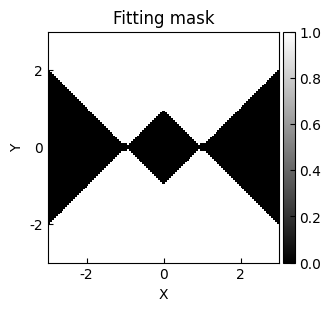

In [24]:
fit_mask = get_mask_sector(rlim=[0.1,5])
plot_heatmap(fit_mask, title='Fitting mask', cmap='gray', cbar_label='')


Goodness of fit:
Chi-squared: 453811.219
Reduced chi-squared: 31.844
RMS residual: 5.618



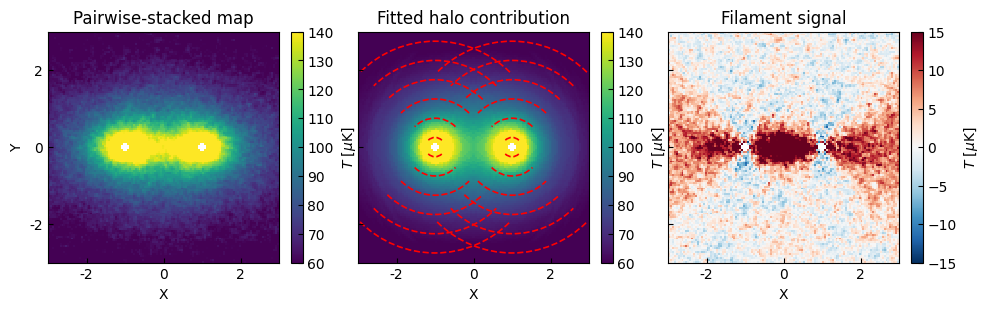

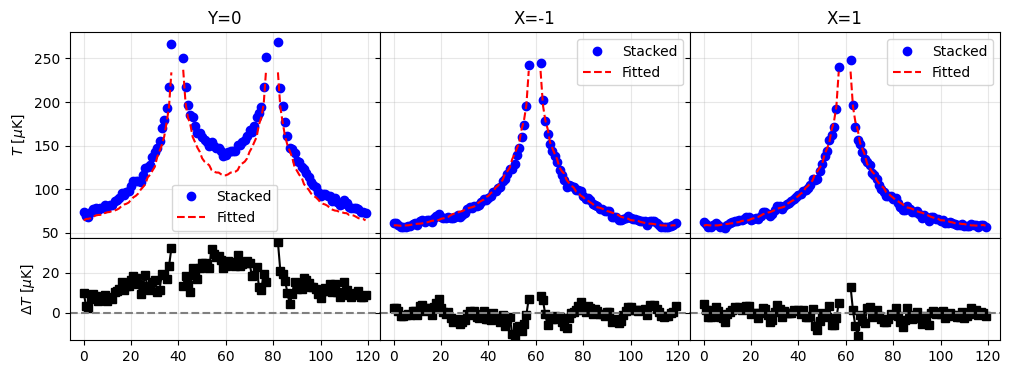

In [25]:
fitted, residual, _, = halo_subtract(
    stack_result_masked, 
    mask=fit_mask,
)

axes = plot_stack_fit_res(
    [stack_result_masked, fitted, residual],  # pyright: ignore[reportArgumentType]
    norm='linear', 
    cmap=['viridis', 'viridis', 'RdBu_r'], 
    vmax=[140,140,15], 
    vmin=[60, 60, -15]
)
plot_sector(axes[1], ec='r')
fname = 'img_tngcube_stack_fit_res.png'
# save_plot(axes, fname)

compare_profiles([stack_result_masked, fitted]); # pyright: ignore[reportArgumentType]

# Estimate filament signal level

In [26]:
from mytools.estimate import get_signal_level
from mytools.plot_custom import plot_profile_2c

Parameter names:
('amplitude_0', 'mean_0', 'stddev_0', 'amplitude_1')
Gauss fit parameters: [np.float64(24.44879947250767), np.float64(0.0), np.float64(0.31192324364275925), np.float64(0.37987578586372045)]
Gauss fit covariance (without fix mean): 
[[ 1.62692582e-01 -1.16086737e-03 -9.26591977e-03]
 [-1.16086737e-03  3.81530743e-05 -2.36433347e-04]
 [-9.26591977e-03 -2.36433347e-04  1.31039894e-02]]
0 points clipped during sigma clipping.

Goodness of fit:
Chi-squared: 133.545
Reduced chi-squared: 1.141
RMS residual: 1.055

width: 0.31192324364275925
width_pix: 6


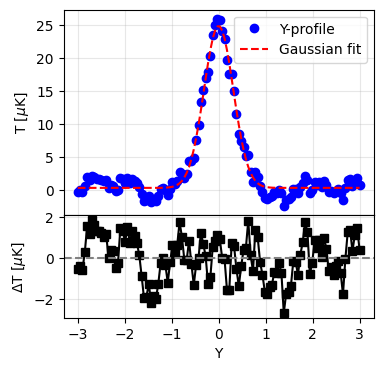

In [27]:
lx, ly, clrb, params, cov = get_signal_level(residual)

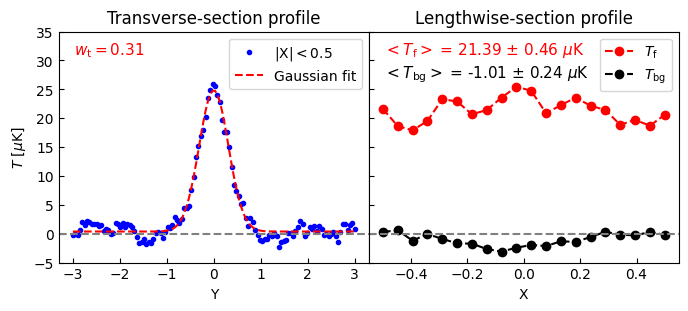

In [28]:
axes = plot_profile_2c(lx, ly, width=params[2], fontsize=11)
axes[0].set_ylim(-5, 35);

# Esitmate filament signal level with fixed width

In [29]:
from mytools.estimate_fixwidth import get_signal_level_fixwidth
from mytools.plot_custom import plot_profile_fixwidth_2c

In [30]:
width = 0.3

lx_fix, ly_fix, ly_err_fix, _, _ = get_signal_level_fixwidth(residual, width=width) # pyright: ignore[reportArgumentType]

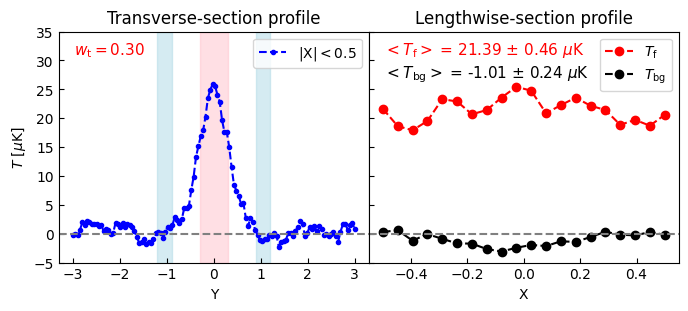

In [31]:
axes = plot_profile_fixwidth_2c(lx_fix, ly_fix, width=width, fontsize=11) # pyright: ignore[reportArgumentType]
axes[0].set_ylim(-5, 35);